In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [2]:
whisky = pd.read_csv("whisky.csv")
whisky.head()

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude
0,1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680
1,2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,\tAB38 9PJ,326340,842570
2,3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,\tAB5 5LI,352960,839320
3,4,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,\tPA42 7EB,141560,646220
4,5,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,\tAB54 4NH,355350,829140


In [3]:
whisky.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   RowID       86 non-null     int64 
 1   Distillery  86 non-null     object
 2   Body        86 non-null     int64 
 3   Sweetness   86 non-null     int64 
 4   Smoky       86 non-null     int64 
 5   Medicinal   86 non-null     int64 
 6   Tobacco     86 non-null     int64 
 7   Honey       86 non-null     int64 
 8   Spicy       86 non-null     int64 
 9   Winey       86 non-null     int64 
 10  Nutty       86 non-null     int64 
 11  Malty       86 non-null     int64 
 12  Fruity      86 non-null     int64 
 13  Floral      86 non-null     int64 
 14  Postcode    86 non-null     object
 15  Latitude    86 non-null     int64 
 16  Longitude   86 non-null     int64 
dtypes: int64(15), object(2)
memory usage: 11.5+ KB


In [4]:
# # Iterate over each column of whisky
# for col in whisky:
#     if whisky[col].dtypes == 'object':
#         whisky = whisky.fillna(whisky[col].value_counts().index[0])

In [5]:
whisky.isnull().sum()

RowID         0
Distillery    0
Body          0
Sweetness     0
Smoky         0
Medicinal     0
Tobacco       0
Honey         0
Spicy         0
Winey         0
Nutty         0
Malty         0
Fruity        0
Floral        0
Postcode      0
Latitude      0
Longitude     0
dtype: int64

There are no null values, I realized this by inspection as well as by the above commands.

In [6]:
whisky.describe()

,RowID,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Latitude,Longitude
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,8.600000e+01
mean,43.500000,2.069767,2.290698,1.534884,0.546512,0.116279,1.244186,1.383721,0.976744,1.465116,1.802326,1.802326,1.697674,287247.162791,8.026597e+05
std,24.969982,0.930410,0.717287,0.863613,0.990032,0.322439,0.853175,0.784686,0.932760,0.821730,0.629094,0.779438,0.855017,67889.046814,8.802422e+04
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126680.000000,5.542600e+05
25%,22.250000,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,265672.500000,7.556975e+05
50%,43.500000,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,319515.000000,8.398850e+05
75%,64.750000,2.000000,3.000000,2.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,328630.000000,8.507700e+05
max,86.000000,4.000000,4.000000,4.000000,4.000000,1.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,381020.000000,1.009260e+06


In [7]:
whis = whisky.drop(["RowID", "Distillery", "Postcode", "Longitude", "Latitude"], axis = 1)

Since the columns are categorical, I converted the data types for these columns to categorical data type.

In [8]:
# whis.Body = whis.Body.astype('category')
# whis.Sweetness = whis.Sweetness.astype('category')
# whis.Smoky = whis.Smoky.astype('category')
# whis.Medicinal = whis.Medicinal.astype('category')
# whis.Tobacco = whis.Tobacco.astype('category')
# whis.Honey = whis.Honey.astype('category')
# whis.Spicy = whis.Spicy.astype('category')
# whis.Winey = whis.Winey.astype('category')
# whis.Nutty = whis.Nutty.astype('category')
# whis.Malty = whis.Malty.astype('category')
# whis.Fruity = whis.Fruity.astype('category')
# whis.Floral = whis.Floral.astype('category')
# whis.info()

In [9]:
# whis.Tobacco = whisky.Tobacco.astype('category')
# # whisky.Distillery = whisky.Distillery.astype('string')

In [10]:
# whis["Nutty"].value_counts()

In [11]:
whis.columns

Index(['Body', 'Sweetness', 'Smoky', 'Medicinal', 'Tobacco', 'Honey', 'Spicy',
       'Winey', 'Nutty', 'Malty', 'Fruity', 'Floral'],
      dtype='object')

In [12]:
# sns.factorplot("Winey", data = whis, kind = "count")
# plt.show()

In [13]:
# sns.factorplot("Body", data=whisky,kind="count", hue="Tobacco")
# sns.factorplot("Sweetness", data=whisky,kind="count", hue="Tobacco")
# sns.factorplot("Smoky", data=whisky,kind="count", hue="Tobacco")
# sns.factorplot("Medicinal", data=whisky,kind="count", hue="Tobacco")
# sns.factorplot("Honey", data=whisky,kind="count", hue="Tobacco")
# sns.factorplot("Spicy", data=whisky,kind="count", hue="Tobacco")
# sns.factorplot("Winey", data=whisky,kind="count", hue="Tobacco")
# sns.factorplot("Nutty", data=whisky,kind="count", hue="Tobacco")
# sns.factorplot("Malty", data=whisky,kind="count", hue="Tobacco")
# sns.factorplot("Fruity", data=whisky,kind="count", hue="Tobacco")
# plt.show()

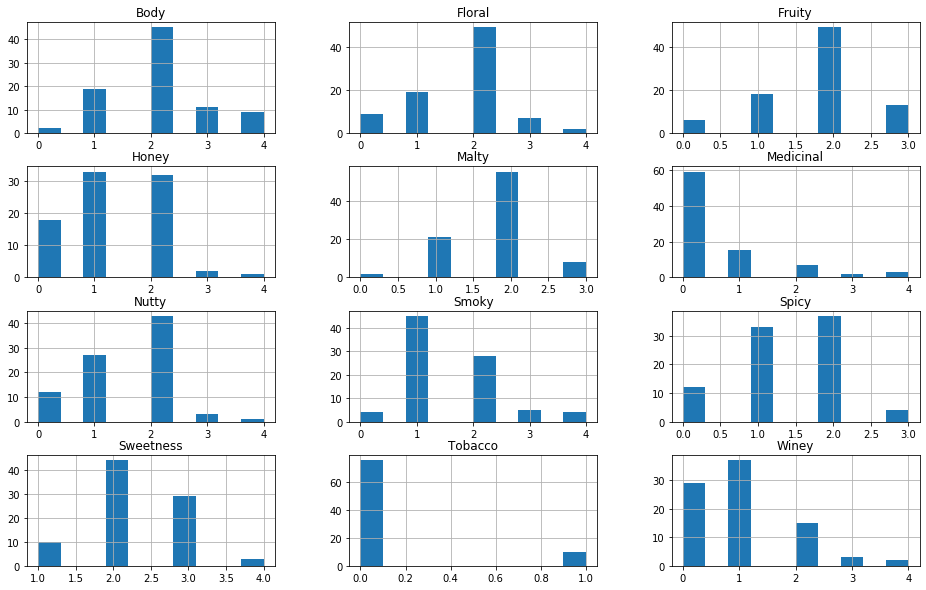

In [14]:
whis.hist(figsize = (16, 10))
plt.show()

In [15]:
# sns.pairplot(whis, hue='Tobacco')

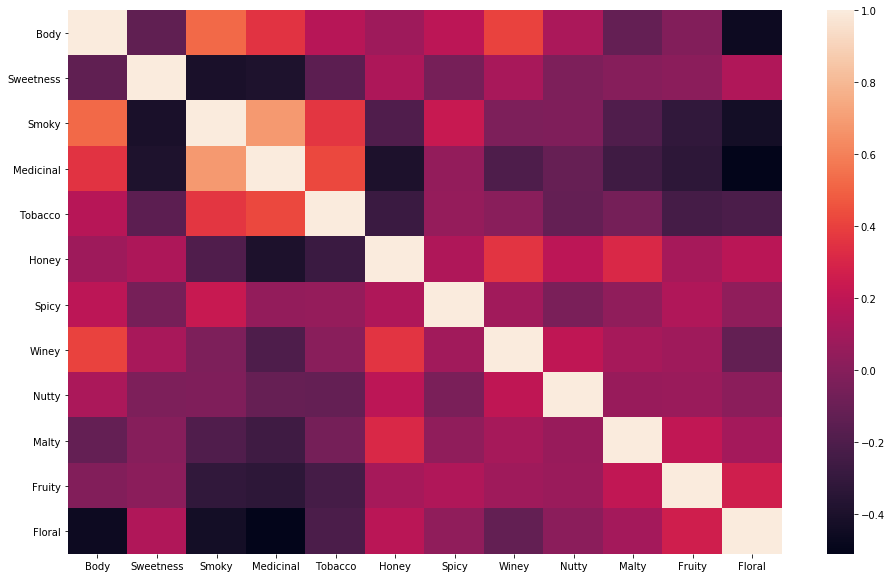

In [16]:
fig, ax = plt.subplots(figsize = (16,10))
sns.heatmap(whis.corr(), ax = ax)

In [17]:
# le = LabelEncoder()

# # Iterate over all the values of each column and extract their dtypes
# for col in whisky:
#     if whisky[col].dtype == 'object':
#         whisky[col] = le.fit_transform(whisky[col])

In [20]:
# Creating the target variable for the test and training sets of data
X = whisky.drop(["RowID", "Distillery", "Tobacco", "Postcode", "Latitude", "Longitude"], axis = 1)
# y = whisky["Tobacco"]

In [26]:
from sklearn.decomposition import KernelPCA
np.random.seed(42)
rbf_pca= KernelPCA(n_components=2, kernel='rbf')
X_reduced= rbf_pca.fit_transform(whis)

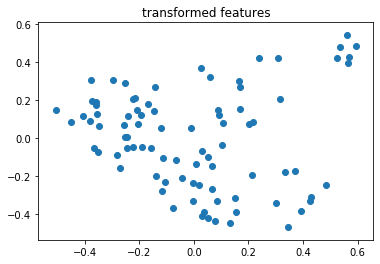

In [28]:
x = X_reduced[:,0]
y = X_reduced[:,1]

plt.scatter(x, y)
plt.title('transformed features')
plt.show()

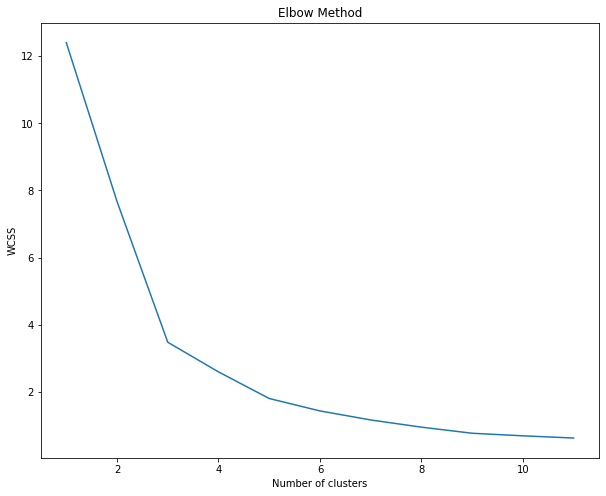

In [32]:
wcss = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_reduced)
    wcss.append(kmeans.inertia_)

fig = plt.figure(figsize=(10,8))
plt.plot(range(1, 12), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

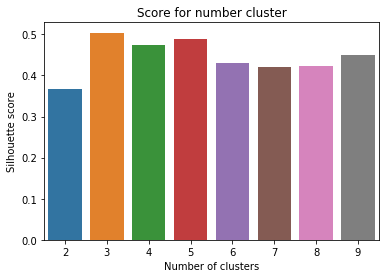

In [33]:
from sklearn.metrics import silhouette_score
sil_scores = []
for clusters in range(2,10):
    km = KMeans(n_clusters=clusters, random_state=42)
    km.fit(X_reduced)
    labels =  km.predict(X_reduced)
    
    #silhouette score
    sil_score = silhouette_score(X_reduced, labels)   
    sil_scores.append(sil_score)
    
sns.barplot(x=list(range(2,10)), y=sil_scores)
plt.title('Score for number cluster')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

In [22]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0) 
y_kmeans = kmeans.fit_predict(X)

# X = X.as_matrix(columns = None)

In [30]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X)
    X["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

ValueError: Expected 2D array, got 1D array instead:
array=[ 0.05068377  0.29942507 -0.2543951   0.59277778  0.03048082 -0.1692525
 -0.35650584  0.03131003 -0.34842715  0.06078208  0.37204534  0.0670304
  0.21256584 -0.19192403  0.15400793 -0.00426256 -0.3590204   0.08310594
  0.20057004  0.10659816 -0.38255186  0.53600039 -0.45242739  0.56289829
  0.00657097 -0.14204562  0.42982868  0.33269591 -0.22244439 -0.10755186
 -0.29777508  0.01686672  0.09203926 -0.27116235  0.16966978 -0.25455519
 -0.0660167  -0.24496476 -0.04257809  0.16888281 -0.21707866 -0.50524179
  0.48296005  0.07705269  0.14955958 -0.37883797 -0.3504256  -0.36025359
 -0.07825189 -0.40513074 -0.14547812  0.0644899   0.03543494  0.21512424
 -0.24121569  0.23890391 -0.11536005  0.56975886  0.52574738 -0.11242448
 -0.25347793 -0.00188586  0.42451848 -0.15699638 -0.20932736  0.39119078
  0.30890386  0.05338067  0.16672737 -0.009449    0.34422979 -0.13831286
 -0.20344895 -0.28337939  0.31741109  0.13250272 -0.19230794  0.56426465
 -0.36537105 -0.22404769  0.02662532 -0.37427633  0.10139334 -0.24635412
  0.08805926 -0.11888058].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
# plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0,1],s=100,c='red',label='Others')
# plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1],s=100,c='blue',label='Main')
# plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
# plt.title('Clusters Whisky tastings')
# plt.legend()
# plt.show()